# Module 2 Final Project Submission

Student name: Noah X. Deutsch (Self-Paced)

## Project Overview


### Objective

Working with the Northwind database, the goal of this project is to answer the question: **Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?** 

Additionally, I was tasked with coming up with at least 3 other questions to test on my own. I chose the following questions, which I thought might yield answers that would add nuance to our initial question and allow us to make more pointed recommendations:

* Does the price of a product have a statistically significant effect on the number of products customers order? 
* Do discounts have a greater or lesser effect on the number of products customers order when the products being ordered are more expensive?
* Do discounts have a greater or lesser effect on the number of products customers order when the products being ordered are cheaper?

For each hypothesis, I have chosen a significance level (alpha) of .05. This means there is a 5% risk of rejecting the null hypothesis even when it is true.


## My Approach

### Obtain Data √

* Connecting to the database
* Create a dataframe to hold the data
* Familiarize myself with the dataset

### Scrub Data √

* Ensure Appropriate Column Data Types
* Deal With Any Null Values
* Separate Control and Experiment Groups

### Explore Data √

* Explore each group's distributions
* Check the key assumptions required to run a test
    * Data is independent
    * Data is collected randomly
    * Data is approximately normally distributed

### Conduct Tests √

* For each experiment
    * Conduct 2 sample T Tests
    * Determine Effect Sizes

### Interpret Results √

* Understand implications
* Make recommendations

# Hypothesis #1

### Question

Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

### Null Hypothesis

Discounts have no effect on the number of products customers order.

### Alternative Hypothesis

Discounts have a statistically significant effect on the number of products customers order.


## Obtain
* Connecting to the database
* Create a dataframe to hold the data
* Familiarize myself with the dataset

A view of our database:
![https://raw.githubusercontent.com/nxd0/dsc-2-final-project-online-ds-sp-000/master/Northwind_ERD.png](https://raw.githubusercontent.com/nxd0/dsc-2-final-project-online-ds-sp-000/master/Northwind_ERD.png)


In [3]:
#import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Connecting to the Northwind database
conn = sqlite3.connect('Northwind_small.sqlite', detect_types=sqlite3.PARSE_COLNAMES)
c = conn.cursor()
c.execute("SELECT * FROM OrderDetail;") #everything we need to proceed is in here

# Creating a new dataframe to hold our data
df = pd.DataFrame(c.fetchall())
df.columns = [i[0] for i in c.description]

In [5]:
#Checking out our dataframe
print (df.shape)
df.head()

(2155, 6)


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## Scrub Data

* Ensure Appropriate Column Data Types
* Deal With Any Null Values
* Separate Control and Experiment Groups

In [6]:
#check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [7]:
#Looks good!
#Now let's check for null values
df.isnull().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

In [8]:
#Cool, this data set is already clean.

#Now we can sepparate into our control and experiment groups.

df_c = df[df['Discount']==0.0]['Quantity']
print (df_c.shape)
df_c.head()

(1317,)


0    12
1    10
2     5
3     9
4    40
Name: Quantity, dtype: int64

In [9]:
df_e = df[df['Discount']!=0.0]['Quantity']
print (df_e.shape)
df_e.head()

(838,)


6     35
7     15
8      6
9     15
11    40
Name: Quantity, dtype: int64

### Explore Data

* Explore each group's distributions
* Check the key assumptions required to run a test
    * Data is independent
    * Data is collected randomly
    * Data is approximately normally distributed

In [10]:
#let's explore a bit.

df_c.mean(), df_e.mean()

(21.715261958997722, 27.10978520286396)

/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


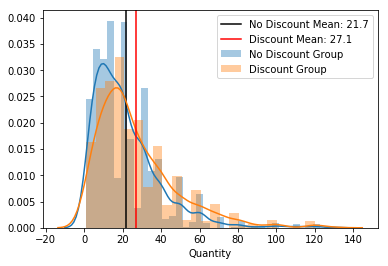

In [11]:
#Distplot in Seaborn with Means

sns.distplot(df_c,label='No Discount Group')
plt.axvline(x=df_c.mean(),color='black',label = "No Discount Mean: 21.7")
sns.distplot(df_e,label='Discount Group')
plt.axvline(x=df_e.mean(),color='red', label = 'Discount Mean: 27.1')
plt.legend(loc='upper right')


In [12]:
#Observations –

#Both appear to be somewhat normal, but with positive skews
#Our Experiment group has a mean of ~27.1 while our control group has a mean of ~21.7. 
#which you can also see visually in our distplot

#Intuitively, I'd expect to see a statistically significant difference between cont. and exp. groups.

In [13]:
#Before moving on, let's check the key assumptions required to run a T test

#Data is independent
    #This is satisfied by the nature of our data – we can assume each order is independant from one another.

#Data is collected randomly
    #We can assume that each data point in the population had an equal chance of being included in the sample.
    
#Data is approximately normally distributed
    #This seems to be the case, based on the above.
    
#Let's move on!

In [14]:
#additionally, let's look at the variances and sample sizes for our two groups 
#This will help us determine which type of T Test to do

print("control var =",np.var(df_c))
print("experiment var =",np.var(df_e))

print("control sample size =",len(df_c))
print("experiment sample size =",len(df_e))

control var = 306.2795924332757
experiment var = 430.93782787748984
control sample size = 1317
experiment sample size = 838


In [15]:
#Looks like we want to use Welch's T Test (vs the Student T Test) since we have differing sample sizes and variances.

## Conduct Tests

* Conduct 2 sample T Tests
* Determine Effect Sizes

In [16]:
#import necessary modules
from scipy import stats

In [17]:
#Since we're trying to determine if the two population means are equal, we can use a 2-sample (Welch's) T Test 

stat,pval = stats.ttest_ind(df_e,df_c,equal_var=False) #Welch
print('Statistic = ',stat)
print('PValue = ',pval)

Statistic =  6.239069142123973
PValue =  5.65641429030433e-10


In [18]:
#Great! We're seeing a very low P-Value. 
#Before we conclusively reject the null hypothesis – let's look at effect size.

def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

print("Cohens D = ",Cohen_d(df_e, df_c))

Cohens D =  0.2862724481729282


In [19]:
#Remembering some rules of thumb for interpreting D
    #Small effect = 0.2
    #Medium Effect = 0.5
    #Large Effect = 0.8
    
#Our D of .28 puts us in the small-medium range.

### We can now, say with 95% confidence, that there is a statistically significant difference between the control and experiment groups with a small-to-medium effect size.

#### However, we still haven't figured out how this varies at different levels of discount.

In [20]:
#to determing how this varies at different levels of discount, 
#we need to conduct T-Tests for each discount level individually

#let's look at the sample sizes for each discount level
for val in np.sort(df[df['Discount']!=0.0]['Discount'].unique()):
    df_e_2 = (df[df['Discount']==val]['Quantity'])
    print('Discount = ',val)
    print('Sample Size = ', len(df_e_2))
    print('\n')

Discount =  0.01
Sample Size =  1


Discount =  0.02
Sample Size =  2


Discount =  0.03
Sample Size =  3


Discount =  0.04
Sample Size =  1


Discount =  0.05
Sample Size =  185


Discount =  0.06
Sample Size =  1


Discount =  0.1
Sample Size =  173


Discount =  0.15
Sample Size =  157


Discount =  0.2
Sample Size =  161


Discount =  0.25
Sample Size =  154




In [21]:
#We'll need to start by bucketing our discounts below .1 (where many values have small sample sizes)

discounts = []
discounts.append(['0-.06',df[df['Discount']!=0.0][df['Discount']<.1]['Quantity']])
discounts.append(['.1',df[df['Discount']==.1]['Quantity']])
discounts.append(['.15',df[df['Discount']==.15]['Quantity']])
discounts.append(['.2',df[df['Discount']==.2]['Quantity']])
discounts.append(['.25',df[df['Discount']==.25]['Quantity']])

for d in discounts:
    print(len(d[1]))

193
173
157
161
154


/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [22]:
#Now that we've bucketed and everything has a respectable sample size, we can proceed.

for d in discounts:
    disc = d[0]
    df_e_2 = d[1]
    stat,pval = stats.ttest_ind(df_e_2,df_c,equal_var=False)
    co_d = Cohen_d(df_e_2, df_c)
    print('Discount = ',disc)
    print('Sample Size = ', len(df_e_2))
    print('PValue = ',round(pval,3))
    print("Cohens D = ",round(co_d,2))
    print('\n')

Discount =  0-.06
Sample Size =  193
PValue =  0.002
Cohens D =  0.29


Discount =  .1
Sample Size =  173
PValue =  0.037
Cohens D =  0.2


Discount =  .15
Sample Size =  157
PValue =  0.0
Cohens D =  0.37


Discount =  .2
Sample Size =  161
PValue =  0.001
Cohens D =  0.3


Discount =  .25
Sample Size =  154
PValue =  0.0
Cohens D =  0.37




In [23]:
#Observations
    #All our Pvalues are below our Alpha threshold. 
    #Cohen's Ds are all in the small–medium range
    #Discounts of .15 and .25 had the largest effect sizes.
    #Discounts of less than .06 had a similar effect to discounts of .2
    #Discounts of .1 had the smallest effect

## Interpret Results

* Understand implications
* Make recommendations

---

### Based on these observations I would recommend that the Northwind company continue using discounting as a strategy to increase the number of products ordered. 
* I would also recommend focusing on discounts of ~15% , which shared the largest effect size with discounts of 25%. 
* In cases where a 15% discount is too high, I would recommend trying a discount of below 6%. Discounts in this range had an effect size roughly equivilent to that of a 20% discount.

In [51]:
#Alternative Approach – Tukey Test
dis_vals = []

for dis in discounts:
    dis_vals.append(dis[1])

v = np.concatenate([df_c,dis_vals[0],dis_vals[1],dis_vals[2],dis_vals[3],dis_vals[4]])
labels = ['control'] * len(df_c) + ['<6%'] * len(dis_vals[0]) + ['10%'] * len(dis_vals[1]) + ['15%'] * len(dis_vals[2]) + ['20%'] * len(dis_vals[3]) + ['25%'] * len(dis_vals[4])

from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(v,labels,.05))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower    upper  reject
-----------------------------------------------
 10%     15%    3.1452  -2.7805   9.0709 False 
 10%     20%    1.7879  -4.0991   7.6748 False 
 10%     25%    3.0033  -2.9526   8.9591 False 
 10%     <6%    1.6853  -3.9432   7.3138 False 
 10%   control -3.5217  -7.8692   0.8257 False 
 15%     20%   -1.3573  -7.3872   4.6725 False 
 15%     25%   -0.1419   -6.239   5.9552 False 
 15%     <6%   -1.4599  -7.2377   4.3179 False 
 15%   control -6.6669  -11.2059 -2.1279  True 
 20%     25%    1.2154  -4.8441   7.2749 False 
 20%     <6%   -0.1026  -5.8406   5.6355 False 
 20%   control -5.3096  -9.7979  -0.8212  True 
 25%     <6%    -1.318  -7.1267   4.4907 False 
 25%   control  -6.525  -11.1033 -1.9467  True 
 <6%   control  -5.207  -9.3506  -1.0635  True 
-----------------------------------------------


In [ ]:
#Conclusions – We can reject the null hypothesis for all discount ranges VS control group EXCEPT with 10% discounts
#Our T Tests produced a type 1 error for the 10% discount range

# Question #2

### Question
Does the price of a product have significant effect on the number of products customers order? 

### Null Hypothesis

The price of a product has no effect on the number of products customers order.

### Alternative Hypothesis

The price of a product has a statistically significant effect on the number of products customers order.


In [23]:
#We can skip a few steps (obtaining, scrubbing, etc) – building on the work in the previous question.

#Let's take a look at price
df['UnitPrice'].describe()

count    2155.000000
mean       26.218520
std        29.827418
min         2.000000
25%        12.000000
50%        18.400000
75%        32.000000
max       263.500000
Name: UnitPrice, dtype: float64

In [64]:
#Let's create new control and experiment groups – based on unit price. 
price_mean = df['UnitPrice'].mean()

df_c_price_low = df[df['UnitPrice']<price_mean]['Quantity']
df_e_price_high = df[df['UnitPrice']>price_mean]['Quantity']

print (df_c_price_low.shape)
print (df_e_price_high.shape)


(1437,)
(718,)


23.567849686847598 24.303621169916436


/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


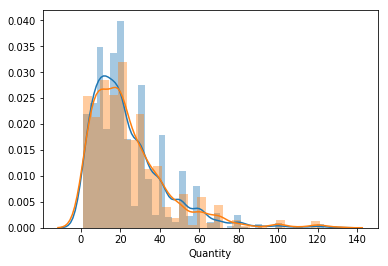

In [65]:
print(df_c_price_low.mean(), df_e_price_high.mean())

sns.distplot(df_c_price_low)
sns.distplot(df_e_price_high)

In [66]:
#Observations –
    #Similar to the last section – both appear to be somewhat normal, but with positive skews
    #Our low group has a mean of ~23.6 while our high price group has a mean of ~24.3. 
    #This is a smaller change than the last test. 

#Intuitively, I'd expect to see a much smaller effect size than with the previous question.
#My guess is we won't be able to reject the null hypothesis here.

In [68]:
stat,pval = stats.ttest_ind(df_e_price_high,df_c_price_low,equal_var=False)
print('PValue = ',pval)

co_d = Cohen_d(df_e_price_high, df_c_price_low)
print("Cohens D = ",round(co_d,2))

PValue =  0.40882539126514883
Cohens D =  0.04


### Ultimately, due to a P-value of .4, we do not have enough evidence to reject the null hypothesis, and must conclude that the price of a product has no statistically significant effect on the number of products customers order.
---


# Questions #3 & #4

### Questions

Do discounts have a greater or lessor effect on the number of products customers order when the products being ordered are more expensive?

Do discounts have a greater or lessor effect on the number of products customers order when the products being ordered are cheaper?

### Null Hypothesis 1

A product being more expensive has no effect on how much discounts effect the number of products customers order.

### Alternative Hypothesis 1

A product being more expensive has a statistically significant effect on how much discounts effect the number of products customers order.

### Null Hypothesis 2

A product being less expensive has no effect on how much discounts effect the number of products customers order.

### Alternative Hypothesis 2

A product being less expensive has a statistically significant effect on how much discounts effect the number of products customers order.

In [28]:
#To test these hypotheses, we'll take the following steps
    #Create three sepparate dataframes based on unit price (high, medium and low)
    #For each dataframe, repeat experiment #1 to understand the effect of discounts on # of products ordered
    #If all Pvals are low, Compare the cohen's Ds to determine which has the largest effect size.

In [70]:
df_prices_sorted = df.sort_values(by=['UnitPrice'])
df_prices_sorted.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
67,10273/33,10273,33,2.0,20,0.0
547,10454/33,10454,33,2.0,20,0.2
443,10414/33,10414,33,2.0,50,0.0
433,10410/33,10410,33,2.0,49,0.0
61,10271/33,10271,33,2.0,24,0.0


In [71]:
price_groups = np.array_split(df_prices_sorted, 3)
df_high = price_groups[2]
df_med = price_groups[1]
df_low = price_groups[0]

In [73]:
#checking to make sure these came out right

print(df_low.shape)
df_low.describe()

(719, 6)


,OrderId,ProductId,UnitPrice,Quantity,Discount
count,719.000000,719.000000,719.000000,719.000000,719.000000
mean,10652.566064,41.841446,9.164812,23.324061,0.056495
std,242.431602,20.581177,3.169939,18.289969,0.083078
min,10248.000000,3.000000,2.000000,1.000000,0.000000
25%,10441.000000,24.000000,7.200000,10.000000,0.000000
50%,10654.000000,41.000000,9.500000,20.000000,0.000000
75%,10861.000000,54.000000,12.000000,30.000000,0.100000
max,11077.000000,77.000000,14.000000,120.000000,0.250000


In [74]:
print(df_med.shape)
df_med.describe()

(718, 6)


,OrderId,ProductId,UnitPrice,Quantity,Discount
count,718.000000,718.000000,718.000000,718.000000,718.000000
mean,10647.383008,36.784123,19.040432,23.811978,0.059666
std,241.419199,24.400069,3.230713,18.817542,0.085600
min,10248.000000,1.000000,14.000000,1.000000,0.000000
25%,10442.250000,14.000000,16.800000,10.000000,0.000000
50%,10635.000000,36.500000,18.400000,20.000000,0.000000
75%,10851.000000,57.000000,21.000000,30.000000,0.100000
max,11077.000000,76.000000,26.200000,130.000000,0.250000


In [75]:
print(df_high.shape)
df_high.describe()

(718, 6)


,OrderId,ProductId,UnitPrice,Quantity,Discount
count,718.000000,718.000000,718.000000,718.000000,718.000000
mean,10678.188022,43.752089,50.474067,24.303621,0.052340
std,239.479933,20.727221,41.471170,19.936364,0.081578
min,10248.000000,7.000000,26.600000,1.000000,0.000000
25%,10484.500000,26.000000,32.000000,10.000000,0.000000
50%,10690.500000,51.000000,38.000000,20.000000,0.000000
75%,10875.500000,61.000000,49.300000,30.000000,0.100000
max,11077.000000,72.000000,263.500000,130.000000,0.250000


In [77]:
#Cool – now we can create control and experiment groups for each group.
df_low_c = df_low[df_low['Discount']==0.0]['Quantity']
df_low_e = df_low[df_low['Discount']!=0.0]['Quantity']

df_med_c = df_med[df_med['Discount']==0.0]['Quantity']
df_med_e = df_med[df_med['Discount']!=0.0]['Quantity']

df_high_c = df_high[df_high['Discount']==0.0]['Quantity']
df_high_e = df_high[df_high['Discount']!=0.0]['Quantity']

21.761467889908257 25.731448763250885
Dif in Means:  3.969980873342628


/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


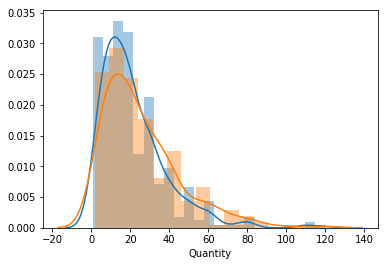

In [78]:
#lets look at means and distplots

print(df_low_c.mean(), df_low_e.mean())
print("Dif in Means: ",df_low_e.mean()-df_low_c.mean())
sns.distplot(df_low_c)
sns.distplot(df_low_e)

21.046838407494146 27.869415807560138
Dif in Means:  6.822577400065992


/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


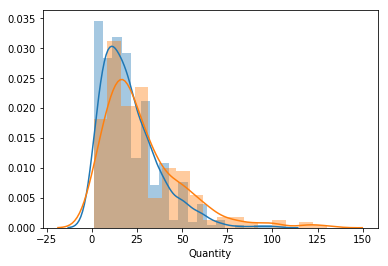

In [79]:
print(df_med_c.mean(), df_med_e.mean())
print("Dif in Means: ",df_med_e.mean()-df_med_c.mean())
sns.distplot(df_med_c)
sns.distplot(df_med_e)

22.29955947136564 27.75
Dif in Means:  5.45044052863436


/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


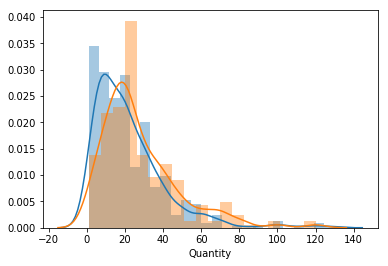

In [80]:
print(df_high_c.mean(), df_high_e.mean())
print("Dif in Means: ",df_high_e.mean()-df_high_c.mean())
sns.distplot(df_high_c)
sns.distplot(df_high_e)

In [38]:
#Observations
    #The difference in means is highest for the Med priced group
    #Second highest difference is the high priced group
    #Lowest difference is in the low priced group

In [81]:
#Great – now let's repeat our T Tests for each group pair.

stat,pval = stats.ttest_ind(df_low_e,df_low_c,equal_var=False)
co_d = Cohen_d(df_low_e, df_low_c)
print('Low Unit Price Group')
print('PValue = ',round(pval,2))
print("Cohens D = ",round(co_d,2))
print('\n')

stat,pval = stats.ttest_ind(df_med_e,df_med_c,equal_var=False)
co_d = Cohen_d(df_med_e, df_med_c)
print('Med Unit Price Group')
print('PValue = ',round(pval,2))
print("Cohens D = ",round(co_d,2))
print('\n')

stat,pval = stats.ttest_ind(df_high_e,df_high_c,equal_var=False)
co_d = Cohen_d(df_high_e, df_high_c)
print('High Unit Price Group')
print('PValue = ',round(pval,2))
print("Cohens D = ",round(co_d,2))


Low Unit Price Group
PValue =  0.01
Cohens D =  0.22


Med Unit Price Group
PValue =  0.0
Cohens D =  0.37


High Unit Price Group
PValue =  0.0
Cohens D =  0.28


In [82]:
#All low P values. 
#Effect sizes mirror the differences between means

### Based on this, I conclude that discounts have a higher effect on number of products ordered for products that are in the "medium" price range (~$14-26)

### Discounts are least effective for "low" priced products (under $14) and are slightly more effective for "high" priced products(26+)

### However, discounts should still be considered effective for increasing the number of products ordered for products in all price ranges (all had a cohen's d > .2)

---


# Thank you!

### Noah Deutsch